In [1]:
import pandas as pd
import sqlite3

In [2]:
import pandas as pd
import sqlite3

orders = pd.read_csv("orders.csv")
users = pd.read_json("users.json")

print(orders.head())
print(users.head())


   order_id  user_id  restaurant_id  order_date  total_amount  \
0         1     2508            450  18-02-2023        842.97   
1         2     2693            309  18-01-2023        546.68   
2         3     2084            107  15-07-2023        163.93   
3         4      319            224  04-10-2023       1155.97   
4         5     1064            293  25-12-2023       1321.91   

                  restaurant_name  
0               New Foods Chinese  
1  Ruchi Curry House Multicuisine  
2           Spice Kitchen Punjabi  
3          Darbar Kitchen Non-Veg  
4       Royal Eatery South Indian  
   user_id    name       city membership
0        1  User_1    Chennai    Regular
1        2  User_2       Pune       Gold
2        3  User_3  Bangalore       Gold
3        4  User_4  Bangalore    Regular
4        5  User_5       Pune       Gold


In [4]:
conn = sqlite3.connect(":memory:")
cursor = conn.cursor()

with open("restaurants.sql", "r", encoding="utf-8") as f:
    sql_script = f.read()

cursor.executescript(sql_script)

restaurants = pd.read_sql_query("SELECT * FROM restaurants", conn)
print(restaurants.head())


   restaurant_id restaurant_name  cuisine  rating
0              1    Restaurant_1  Chinese     4.8
1              2    Restaurant_2   Indian     4.1
2              3    Restaurant_3  Mexican     4.3
3              4    Restaurant_4  Chinese     4.1
4              5    Restaurant_5  Chinese     4.8


In [18]:
merged_1 = pd.merge(
    orders,
    users,
    on="user_id",                     #merge orders+users(left join)
    how="left"              
)
print(merged_1.head())

   order_id  user_id  restaurant_id  order_date  total_amount  \
0         1     2508            450  18-02-2023        842.97   
1         2     2693            309  18-01-2023        546.68   
2         3     2084            107  15-07-2023        163.93   
3         4      319            224  04-10-2023       1155.97   
4         5     1064            293  25-12-2023       1321.91   

                  restaurant_name       name       city membership  
0               New Foods Chinese  User_2508  Hyderabad    Regular  
1  Ruchi Curry House Multicuisine  User_2693       Pune    Regular  
2           Spice Kitchen Punjabi  User_2084    Chennai       Gold  
3          Darbar Kitchen Non-Veg   User_319  Bangalore       Gold  
4       Royal Eatery South Indian  User_1064       Pune    Regular  


In [20]:
final_df = pd.merge(
    merged_1,
    restaurants,                                 #merge with restaurants(left join)
    on="restaurant_id",
    how="left"
)

print(final_df.head())
print(final_df.info())


   order_id  user_id  restaurant_id  order_date  total_amount  \
0         1     2508            450  18-02-2023        842.97   
1         2     2693            309  18-01-2023        546.68   
2         3     2084            107  15-07-2023        163.93   
3         4      319            224  04-10-2023       1155.97   
4         5     1064            293  25-12-2023       1321.91   

                restaurant_name_x       name       city membership  \
0               New Foods Chinese  User_2508  Hyderabad    Regular   
1  Ruchi Curry House Multicuisine  User_2693       Pune    Regular   
2           Spice Kitchen Punjabi  User_2084    Chennai       Gold   
3          Darbar Kitchen Non-Veg   User_319  Bangalore       Gold   
4       Royal Eatery South Indian  User_1064       Pune    Regular   

  restaurant_name_y  cuisine  rating  
0    Restaurant_450  Mexican     3.2  
1    Restaurant_309   Indian     4.5  
2    Restaurant_107  Mexican     4.0  
3    Restaurant_224  Chinese    

In [22]:
#final dataset
final_df.to_csv("final_food_delivery_dataset.csv", index=False)
print("Saved: final_food_delivery_dataset.csv")


Saved: final_food_delivery_dataset.csv


In [26]:
import pandas as pd
import matplotlib.pyplot as plt

final_df = pd.read_csv("final_food_delivery_dataset.csv")

final_df['order_date'] = pd.to_datetime(final_df['order_date'], format="%d-%m-%Y")

In [28]:
final_df.head()

,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name_x,name,city,membership,restaurant_name_y,cuisine,rating
0,1,2508,450,2023-02-18,842.97,New Foods Chinese,User_2508,Hyderabad,Regular,Restaurant_450,Mexican,3.2
1,2,2693,309,2023-01-18,546.68,Ruchi Curry House Multicuisine,User_2693,Pune,Regular,Restaurant_309,Indian,4.5
2,3,2084,107,2023-07-15,163.93,Spice Kitchen Punjabi,User_2084,Chennai,Gold,Restaurant_107,Mexican,4.0
3,4,319,224,2023-10-04,1155.97,Darbar Kitchen Non-Veg,User_319,Bangalore,Gold,Restaurant_224,Chinese,4.8
4,5,1064,293,2023-12-25,1321.91,Royal Eatery South Indian,User_1064,Pune,Regular,Restaurant_293,Italian,3.0


In [30]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_id           10000 non-null  int64         
 1   user_id            10000 non-null  int64         
 2   restaurant_id      10000 non-null  int64         
 3   order_date         10000 non-null  datetime64[ns]
 4   total_amount       10000 non-null  float64       
 5   restaurant_name_x  10000 non-null  object        
 6   name               10000 non-null  object        
 7   city               10000 non-null  object        
 8   membership         10000 non-null  object        
 9   restaurant_name_y  10000 non-null  object        
 10  cuisine            10000 non-null  object        
 11  rating             10000 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 937.6+ KB


In [32]:
orders_by_date = final_df.groupby(final_df['order_date'].dt.date).size()
orders_by_date.head()


order_date
2023-01-01    29
2023-01-02    19
2023-01-03    35
2023-01-04    26
2023-01-05    25
dtype: int64

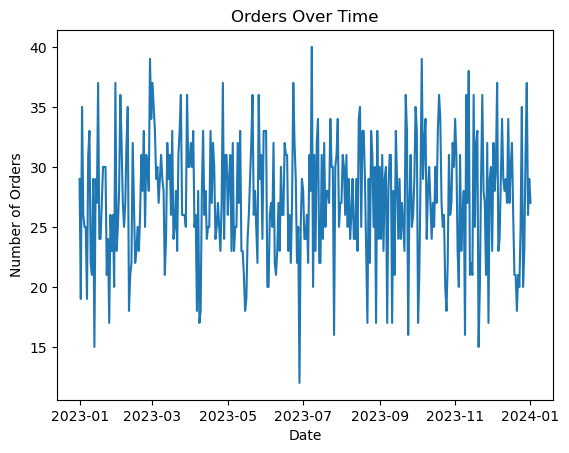

In [34]:
orders_by_date = final_df.groupby(final_df['order_date'].dt.date).size()
                                                                 #Order trends over time
plt.figure()
orders_by_date.plot(title="Orders Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Orders")
plt.show()

In [82]:
# Combine the two restaurant columns into one
final_df['restaurant_name'] = final_df['restaurant_name_x'].combine_first(final_df['restaurant_name_y'])

# Optional: drop the old columns to keep things clean
final_df = final_df.drop(['restaurant_name_x', 'restaurant_name_y'], axis=1)

# Confirm the new column exists
print(final_df.columns)


Index(['order_id', 'user_id', 'restaurant_id', 'order_date', 'total_amount',
       'name', 'city', 'membership', 'cuisine', 'rating', 'rating_range',
       'restaurant_name'],
      dtype='object')


In [40]:
#user behaviour patterns
#orders per user
orders_per_user = final_df.groupby("user_id")["order_id"].count()
orders_per_user.describe()

count    2883.000000
mean        3.468609
std         1.792682
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        13.000000
Name: order_id, dtype: float64

In [48]:
#avg spend per user
avg_spend_per_user = final_df.groupby("user_id")["total_amount"].mean()
avg_spend_per_user.describe()

count    2883.000000
mean      799.247530
std       251.053045
min       102.220000
25%       640.187500
50%       800.686000
75%       961.117083
max      1497.420000
Name: total_amount, dtype: float64

city
Bangalore    2206946.58
Chennai      1990513.03
Pune         1924797.93
Hyderabad    1889366.58
Name: total_amount, dtype: float64


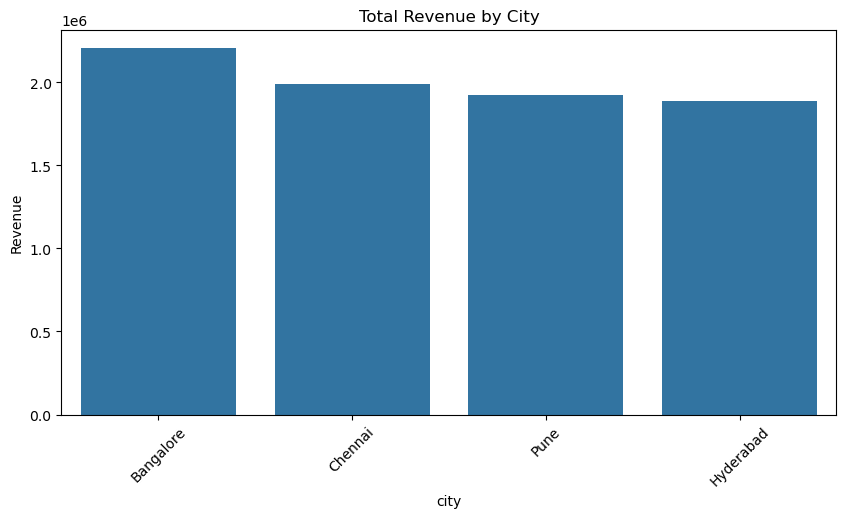

cuisine
Chinese    4.099338
Italian    4.042457
Indian     4.021466
Mexican    4.020767
Name: rating, dtype: float64


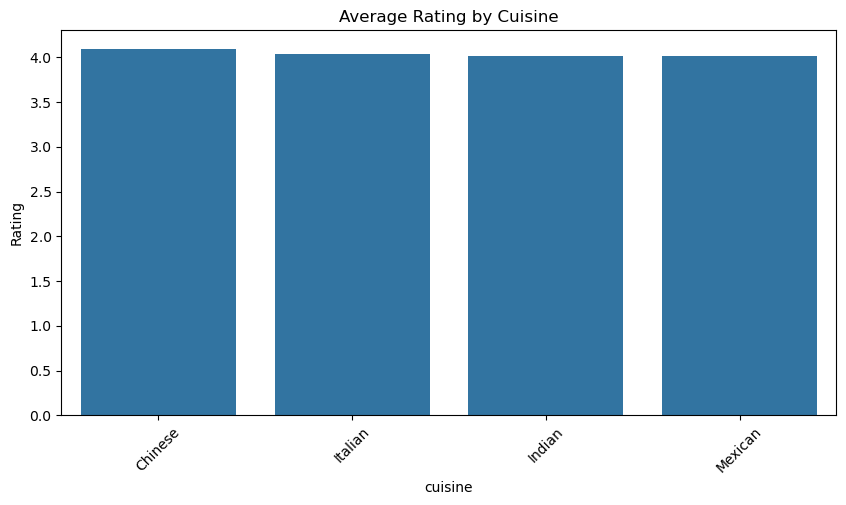

In [52]:
#City-wise and Cuisine-wise Performance
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# City-wise total revenue
city_revenue = final_df.groupby('city')['total_amount'].sum().sort_values(ascending=False)
print(city_revenue)

# Plot city revenue
plt.figure(figsize=(10,5))
sns.barplot(x=city_revenue.index, y=city_revenue.values)
plt.title("Total Revenue by City")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()

# Cuisine-wise average rating
cuisine_rating = final_df.groupby('cuisine')['rating'].mean().sort_values(ascending=False)
print(cuisine_rating)

# Plot cuisine rating
plt.figure(figsize=(10,5))
sns.barplot(x=cuisine_rating.index, y=cuisine_rating.values)
plt.title("Average Rating by Cuisine")
plt.ylabel("Rating")
plt.xticks(rotation=45)
plt.show()


membership
Gold       797.145556
Regular    805.158434
Name: total_amount, dtype: float64
membership
Gold       4987
Regular    5013
Name: order_id, dtype: int64


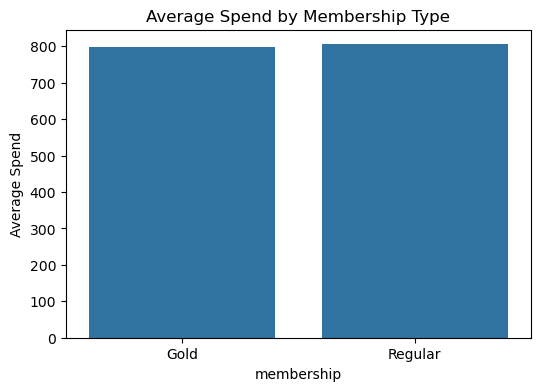

In [54]:
#Membership Impact (Gold vs Regular)
# Avg spend per membership type
membership_spend = final_df.groupby('membership')['total_amount'].mean()
print(membership_spend)

# Avg number of orders per membership type
membership_orders = final_df.groupby('membership')['order_id'].count()
print(membership_orders)

# Plot spend comparison
plt.figure(figsize=(6,4))
sns.barplot(x=membership_spend.index, y=membership_spend.values)
plt.title("Average Spend by Membership Type")
plt.ylabel("Average Spend")
plt.show()


order_date
2023-01    645818.76
2023-02    630867.40
2023-03    716738.98
2023-04    666097.18
2023-05    668428.61
2023-06    610822.93
2023-07    688559.45
2023-08    694987.58
2023-09    653838.07
2023-10    699187.73
2023-11    637772.43
2023-12    681303.50
2024-01     17201.50
Freq: M, Name: total_amount, dtype: float64


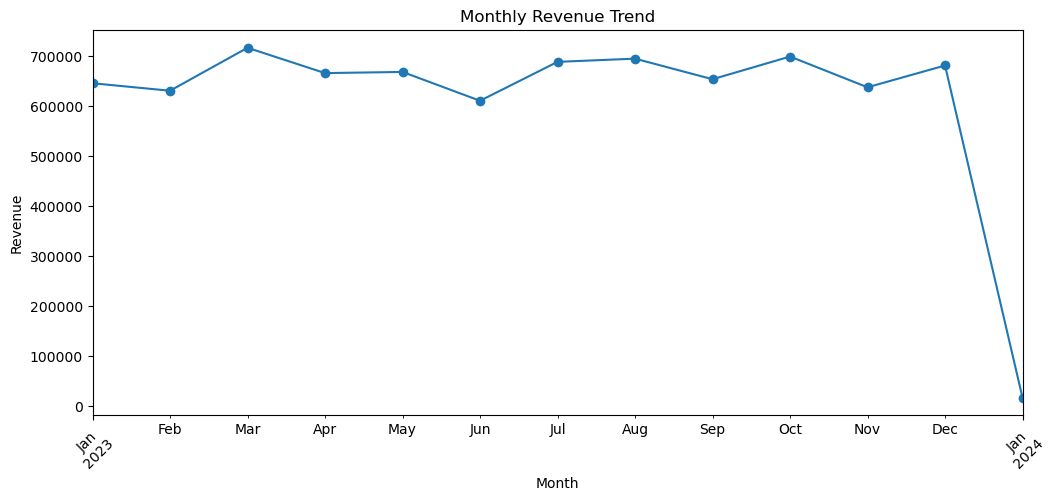

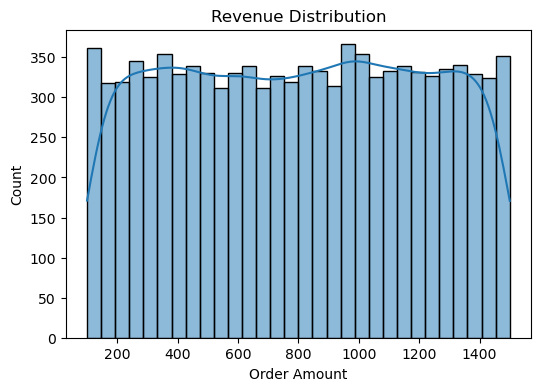

In [57]:
#Revenue Distribution and Seasonality
# Convert order_date to datetime
final_df['order_date'] = pd.to_datetime(final_df['order_date'])

# Monthly revenue
monthly_revenue = final_df.groupby(final_df['order_date'].dt.to_period('M'))['total_amount'].sum()
print(monthly_revenue)

# Plot monthly revenue
plt.figure(figsize=(12,5))
monthly_revenue.plot(kind='line', marker='o')
plt.title("Monthly Revenue Trend")
plt.ylabel("Revenue")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.show()

# Revenue distribution
plt.figure(figsize=(6,4))
sns.histplot(final_df['total_amount'], bins=30, kde=True)
plt.title("Revenue Distribution")
plt.xlabel("Order Amount")
plt.show()


In [59]:
# Which city has the highest total revenue (total_amount) from Gold members?
gold_df = final_df[final_df['membership'] == 'Gold']
city_gold_revenue = gold_df.groupby('city')['total_amount'].sum()
print(city_gold_revenue.sort_values(ascending=False))


city
Chennai      1080909.79
Pune         1003012.32
Bangalore     994702.59
Hyderabad     896740.19
Name: total_amount, dtype: float64


In [61]:
#Which cuisine has the highest average order value across all orders?
cuisine_avg_order = final_df.groupby('cuisine')['total_amount'].mean()
print(cuisine_avg_order.sort_values(ascending=False))


cuisine
Mexican    808.021344
Italian    799.448578
Indian     798.466011
Chinese    798.389020
Name: total_amount, dtype: float64


In [63]:
#How many distinct users placed orders worth more than ₹1000 in total?
user_total = final_df.groupby('user_id')['total_amount'].sum()
high_spenders = user_total[user_total > 1000]
print(len(high_spenders))

2544


In [67]:
#Which restaurant rating range generated the highest total revenue?
# Create rating bins
bins = [3.0, 3.5, 4.0, 4.5, 5.0]
labels = ['3.0–3.5', '3.6–4.0', '4.1–4.5', '4.6–5.0']
final_df['rating_range'] = pd.cut(final_df['rating'], bins=bins, labels=labels, include_lowest=True)
rating_revenue = final_df.groupby('rating_range', observed=True)['total_amount'].sum().sort_values(ascending=False)
print("\nRevenue by rating range:\n", rating_revenue)



Revenue by rating range:
 rating_range
4.6–5.0    2197030.75
3.0–3.5    2136772.70
4.1–4.5    1960326.26
3.6–4.0    1717494.41
Name: total_amount, dtype: float64


In [70]:
#Among Gold members, which city has the highest average order value?
gold_city_avg = gold_df.groupby('city', observed=True)['total_amount'].mean().sort_values(ascending=False)
print("\nGold members - avg order per city:\n", gold_city_avg)


Gold members - avg order per city:
 city
Chennai      808.459080
Hyderabad    806.421034
Bangalore    793.223756
Pune         781.162243
Name: total_amount, dtype: float64


In [72]:
#Which cuisine has the lowest number of distinct restaurants but still contributes significant revenue?
cuisine_rest_count = final_df.groupby('cuisine', observed=True)['restaurant_id'].nunique()
cuisine_revenue = final_df.groupby('cuisine', observed=True)['total_amount'].sum()
cuisine_stats = pd.DataFrame({'distinct_restaurants': cuisine_rest_count, 'revenue': cuisine_revenue})
print("\nCuisine stats (restaurants & revenue):\n", cuisine_stats)


Cuisine stats (restaurants & revenue):
          distinct_restaurants     revenue
cuisine                                  
Chinese                   120  1930504.65
Indian                    126  1971412.58
Italian                   126  2024203.80
Mexican                   128  2085503.09


In [74]:
#What percentage of total orders were placed by Gold members? (Rounded to nearest integer)
gold_percentage = round((len(gold_df)/len(final_df)) * 100)
print("\nPercentage of orders by Gold members:", gold_percentage, "%")


Percentage of orders by Gold members: 50 %


In [84]:
#Which restaurant has the highest average order value but less than 20 total orders?
rest_stats = final_df.groupby('restaurant_name', observed=True).agg({'total_amount':['mean','count']})
rest_stats.columns = ['avg_order_value','order_count']

top_small_rest = rest_stats[rest_stats['order_count']<20].sort_values(by='avg_order_value', ascending=False).head(1)
print(top_small_rest)




                          avg_order_value  order_count
restaurant_name                                       
Hotel Dhaba Multicuisine      1040.222308           13


In [86]:
#Which combination contributes the highest revenue?
combo_revenue = final_df.groupby(['membership','cuisine'], observed=True)['total_amount'].sum().sort_values(ascending=False)
print("\nHighest revenue combination:\n", combo_revenue.head(1))


Highest revenue combination:
 membership  cuisine
Regular     Mexican    1072943.3
Name: total_amount, dtype: float64


In [88]:
#During which quarter of the year is the total revenue highest?
final_df['quarter'] = final_df['order_date'].dt.quarter
quarter_revenue = final_df.groupby('quarter', observed=True)['total_amount'].sum().sort_values(ascending=False)
print("\nRevenue by quarter:\n", quarter_revenue)


Revenue by quarter:
 quarter
3    2037385.10
4    2018263.66
1    2010626.64
2    1945348.72
Name: total_amount, dtype: float64


In [90]:
#Numerical Values
#How many total orders were placed by users with Gold membership?
gold_orders_count = len(final_df[final_df['membership'] == 'Gold'])
print("Total Gold orders:", gold_orders_count)

Total Gold orders: 4987


In [92]:
#What is the total revenue (rounded to nearest integer) generated from orders placed in Hyderabad city?
hyderabad_revenue = final_df[final_df['city'] == 'Hyderabad']['total_amount'].sum()
print("Revenue Hyderabad (rounded):", round(hyderabad_revenue))

Revenue Hyderabad (rounded): 1889367


In [94]:
#How many distinct users placed at least one order?
distinct_users = final_df['user_id'].nunique()
print("Distinct users:", distinct_users)

Distinct users: 2883


In [96]:
#What is the average order value (rounded to 2 decimals) for Gold members?
gold_avg_order = final_df[final_df['membership']=='Gold']['total_amount'].mean()
print("Average Gold order value:", round(gold_avg_order,2))

Average Gold order value: 797.15


In [98]:
#How many orders were placed for restaurants with rating ≥ 4.5?
high_rating_orders = len(final_df[final_df['rating'] >= 4.5])
print("Orders with rating >= 4.5:", high_rating_orders)

Orders with rating >= 4.5: 3374


In [100]:
#How many orders were placed in the top revenue city among Gold members only?
gold_df = final_df[final_df['membership']=='Gold']
top_city = gold_df.groupby('city', observed=True)['total_amount'].sum().idxmax()


top_city_orders = len(gold_df[gold_df['city'] == top_city])
print("Orders in top Gold city:", top_city_orders)

Orders in top Gold city: 1337
